# <h1><b>Credit Card</b></h1>
<p>
This data is a credit card from a bank. The situation is there were customers leaving the services simultaneously. I will try to see what can we do to retain the customers or retaliate this situation. The operation is also known as <i><b>Churn prediction</b></i>.
</p>
<p>
This project divides in 2 parts where each will illustrate the data analysis tasks;
<ol>
    <li><b>Data Cleaning:</b> This part explore the data in a very quick galnce with basic overview of the data.</li>
    <li><b>EDA:</b> Explore and view characteristic of data in manner of descriptive statistics. </li>
</ol>
The data used in the project is from Kaggle <a href="https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data">Data</a>
</p>

# <h1><b>Header</b></h1>

<p>
    Import libraries to use in the project.
</p>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import *

# <h1><b>Data Cleaning</b></h1>

<p>
    The data is in form of <code>.csv</code>
</p>

In [2]:
# Load data
df = pd.read_csv("data/data.csv")

Display number of rows and columns in data

In [3]:
# Display data rows and columns
row, col = df.shape
print(f"row: {row}")
print(f"col: {col}")

row: 10127
col: 23


Display all column headers

In [4]:
# View all columns
view_columns(data=df)

1. CLIENTNUM
2. Attrition_Flag
3. Customer_Age
4. Gender
5. Dependent_count
6. Education_Level
7. Marital_Status
8. Income_Category
9. Card_Category
10. Months_on_book
11. Total_Relationship_Count
12. Months_Inactive_12_mon
13. Contacts_Count_12_mon
14. Credit_Limit
15. Total_Revolving_Bal
16. Avg_Open_To_Buy
17. Total_Amt_Chng_Q4_Q1
18. Total_Trans_Amt
19. Total_Trans_Ct
20. Total_Ct_Chng_Q4_Q1
21. Avg_Utilization_Ratio
22. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
23. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


<p>
    Drop the non-factor columns, <b style="color:red">number 22 and 23</b>.
</p>

In [5]:
    # Drop last 2 columns
df.drop(columns=df.columns[-2:], inplace=True)
view_columns(data=df)

1. CLIENTNUM
2. Attrition_Flag
3. Customer_Age
4. Gender
5. Dependent_count
6. Education_Level
7. Marital_Status
8. Income_Category
9. Card_Category
10. Months_on_book
11. Total_Relationship_Count
12. Months_Inactive_12_mon
13. Contacts_Count_12_mon
14. Credit_Limit
15. Total_Revolving_Bal
16. Avg_Open_To_Buy
17. Total_Amt_Chng_Q4_Q1
18. Total_Trans_Amt
19. Total_Trans_Ct
20. Total_Ct_Chng_Q4_Q1
21. Avg_Utilization_Ratio


Viewing structure of data, check type and null value.

In [6]:
# Display summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
# Display null columns
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
# statistical summary
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<p>
Some of the columns are string so it should be transformed to numerical data for further processing.<br>
To transformed is to see the unique values in each columns create a new column and define the qualitative values with numbers. However, some columns should be treat with others logic so it would probably be a future transformation.
</p>

In [10]:
# show string columns
for index, col in enumerate(df.columns):
    col_type = type(df[col].iloc[0])
    if str(col_type) == "<class 'str'>":
        print(f"{index + 1}. {col} {col_type}")

2. Attrition_Flag <class 'str'>
4. Gender <class 'str'>
6. Education_Level <class 'str'>
7. Marital_Status <class 'str'>
8. Income_Category <class 'str'>
9. Card_Category <class 'str'>


In [11]:
for index, col in enumerate(df.columns):
    col_type = type(df[col].iloc[0])
    if str(col_type) == "<class 'str'>":
        print(f"{index + 1}. {col}: {len(df[f"{col}"].unique())} unique values\n{df[f"{col}"].unique()}")

2. Attrition_Flag: 2 unique values
['Existing Customer' 'Attrited Customer']
4. Gender: 2 unique values
['M' 'F']
6. Education_Level: 7 unique values
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
7. Marital_Status: 4 unique values
['Married' 'Single' 'Unknown' 'Divorced']
8. Income_Category: 6 unique values
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
9. Card_Category: 4 unique values
['Blue' 'Gold' 'Silver' 'Platinum']


In [12]:
# Data transformation

df["Attrition_Flag_num"] = df["Attrition_Flag"].map(Attrition_Flag_map)
df["Gender_num"] = df["Gender"].map(Gender_map)
df["Education_Level_num"] = df["Education_Level"].map(Education_Level_map)
df["Marital_Status_num"] = df["Marital_Status"].map(Marital_Status_map)
df["Income_Category_num"] = df["Income_Category"].map(Income_Category_map)
df["Card_Category_num"] = df["Card_Category"].map(Card_Category_map)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# <h1><b>EDA (Exploratory Data Analysis)</b></h1>

<p>
<i style="color:gray">This part is mostly Data Analytics part.</i>
<br>
The main objective is to do churns prediction. However, there are a lot of columns including the news that we've added recently. So, we need to review some essential to see the whole picture.
</p>

<p>
    To simply view data, I will try match the plot between <i>Churn</i> or <i>Attrition</i> to another parameters.
</p>

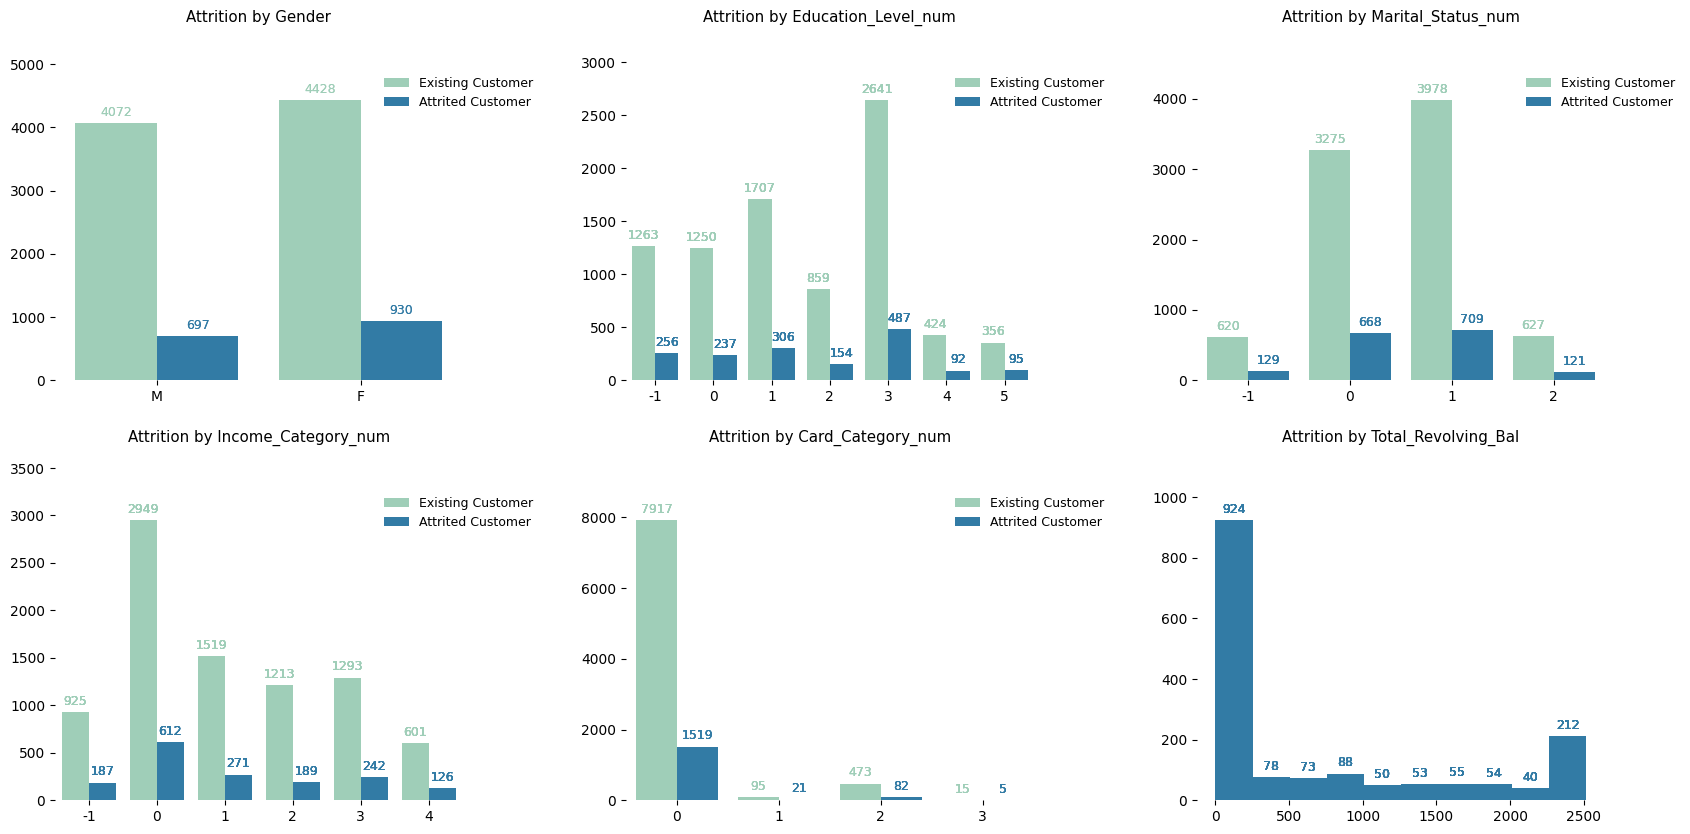

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
plt.subplots_adjust(wspace=0.4)
parameters = ["Gender", "Education_Level_num", "Marital_Status_num", "Income_Category_num", "Card_Category_num", "Total_Revolving_Bal"]

bar_params = parameters[:-1]
hist_param = parameters[-1]

for ax, param in zip(axs.flat[:len(bar_params)], bar_params):
    simple_bar_plot(data=df, x=param, y="Attrition_Flag", ax=ax)
    ax.set_title(f"Attrition by {param}")

ax = axs.flat[len(bar_params)]
simple_hist_plot(data=df, x=hist_param, y="Attrition_Flag_num", ax=ax)
ax.set_title(f"Attrition by {hist_param}")

# for ax in axs.flat[len(parameters):]:
#     # ax.set_visible(False)

# plt.tight_layout()
plt.show()

Let's see the spreadness of Total revolving

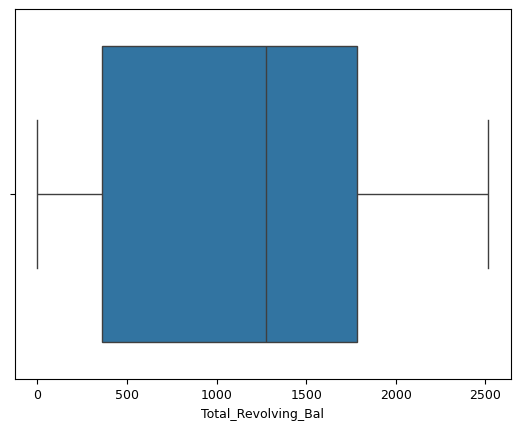

In [15]:
sns.boxplot(
    data=df,
    x="Total_Revolving_Bal"
)

plt.show()

<p>
In the 6th graph we can see that most of the attried customers were those who used less of credit cards following with those who used most of among the sample.
<br>
Let's see how credit limit impacts total revolving
</p>

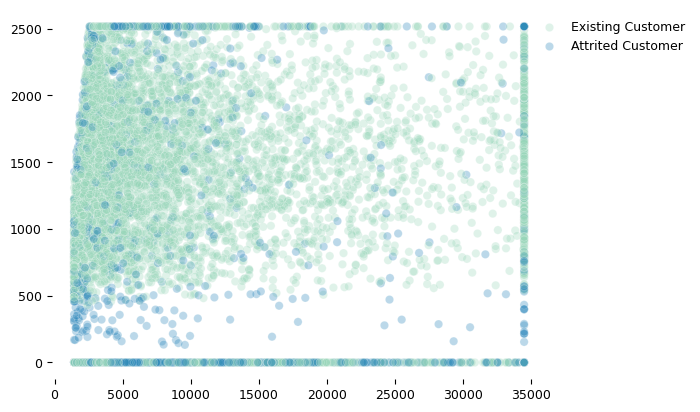

In [16]:
# all customers
simple_scatter_plot(
    data=df, 
    x="Credit_Limit", 
    y="Total_Revolving_Bal",
)

<Figure size 800x600 with 0 Axes>

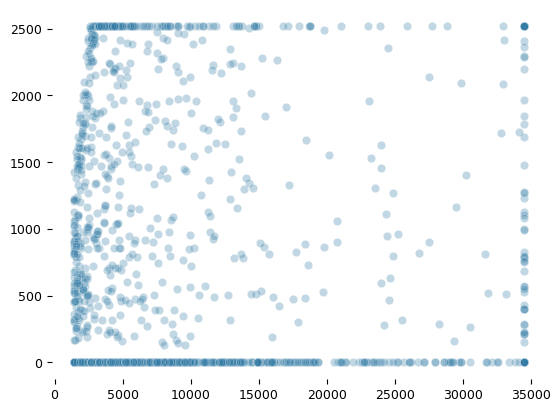

In [17]:
# only Attired customers
plt.figure(figsize=(8, 6))
df_filtered = df[df["Attrition_Flag_num"] == 0]
simple_scatter_plot(
    data=df_filtered,
    x="Credit_Limit", 
    y="Total_Revolving_Bal",
    hue=None,
    color="#327BA5"
)

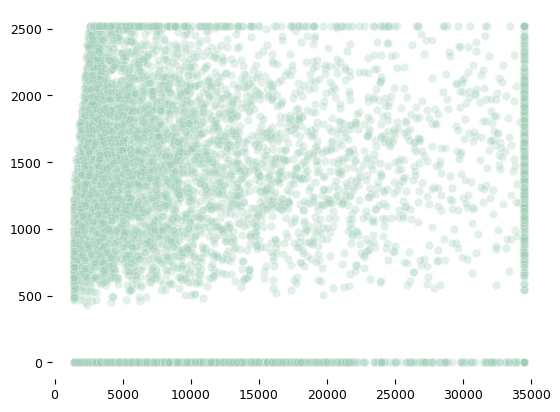

In [18]:
# only current customers
df_filtered = df[df["Attrition_Flag_num"] == 1]
simple_scatter_plot(
    data=df_filtered,
    x="Credit_Limit", 
    y="Total_Revolving_Bal",
    hue=None,
    color="#9FCEB8"
)

<p>
It seems like both case have the similar characteristic. Dense population area displays most attired customers which are;
<ul>
    <li>The customeres who barely use the credit card.</li>
    <li>The customers with a very limited credit and use a very high amount of credit in sample.</li>
</ul>
</p>

<p>
    Let's extend the observation more than direct churn factor.
</p>

['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
[ 1  3  0 -1  2  4  5]


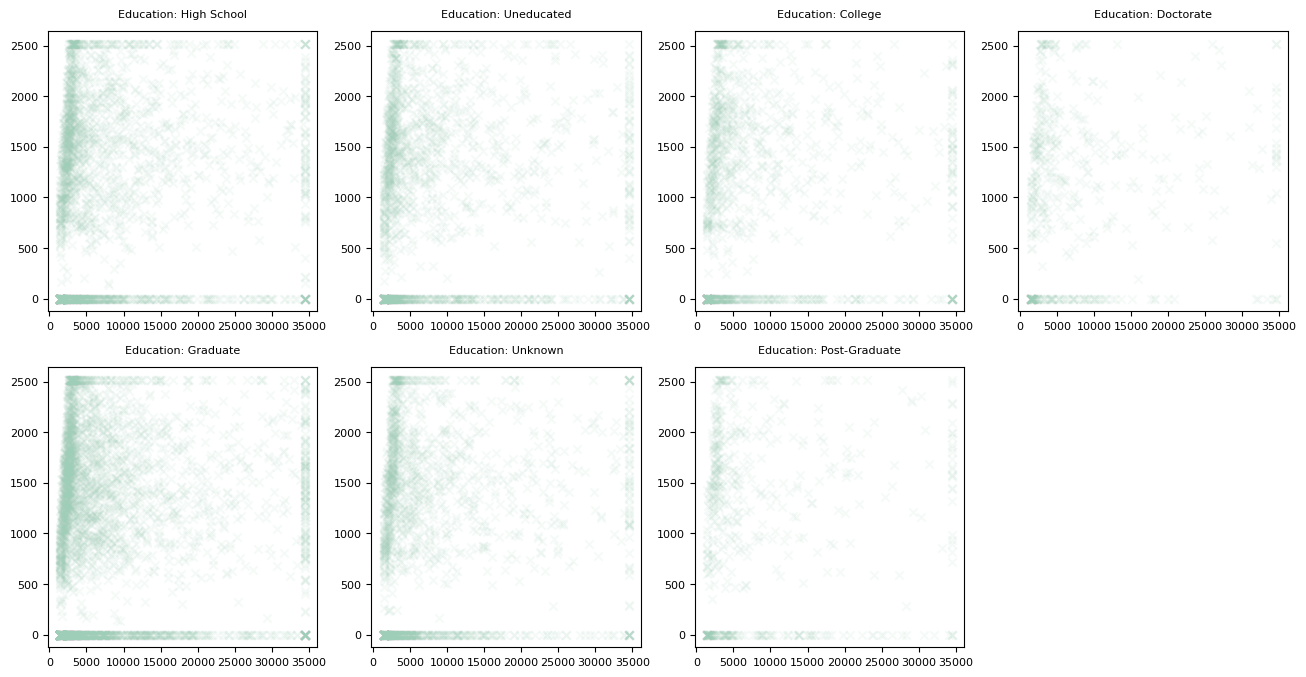

In [19]:
print(df["Education_Level"].dropna().unique())
print(df["Education_Level_num"].dropna().unique())

plt.rcParams["font.size"] = 8
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
index = 0
educations = df["Education_Level"].dropna().unique()

for j in range(4):
    for i in range(2):
        if index >= len(educations):
            axes[i, j].set_visible(False)
            break
        
        edu_level = educations[index]
        condition = df["Education_Level"] == edu_level
        x = df[condition]["Credit_Limit"]
        y = df[condition]["Total_Revolving_Bal"]
        axes[i, j].scatter(x, y, alpha=0.1, color="#9FCEB8", marker="x")
        axes[i, j].set_title(f"Education: {edu_level}", pad=10, fontsize=8)
        
        index += 1

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

<p>
    The characteristic of credit being used and credit limit <b style="color:red">doesn't change</b> through out <i>education levels</i>.
</p>

<p>
    Let's see the card category impacts the credit used.
</p>

['Blue' 'Gold' 'Silver' 'Platinum']


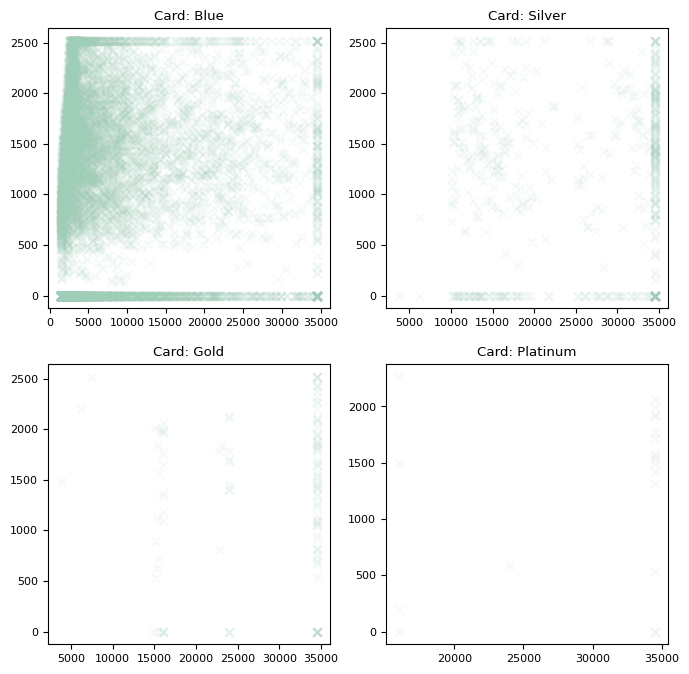

In [20]:
print(df["Card_Category"].dropna().unique())

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.rcParams["font.size"] = 8
index = 0
cards = df["Card_Category"].dropna().unique()

for j in range(2):
    for i in range(2):
        if index > len(cards):
            axes[i, j].set_visible(False)
            break
        
        card = cards[index]
        condition = df["Card_Category"] == card
        x = df[condition]["Credit_Limit"]
        y = df[condition]["Total_Revolving_Bal"]
        axes[i, j].scatter(x, y, alpha=0.1, color="#9FCEB8", marker="x")
        axes[i, j].set_title(f"Card: {card}")
        
        index += 1

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

<p>
    See if the character of cards impact the churn?
</p>

['Blue' 'Gold' 'Silver' 'Platinum']


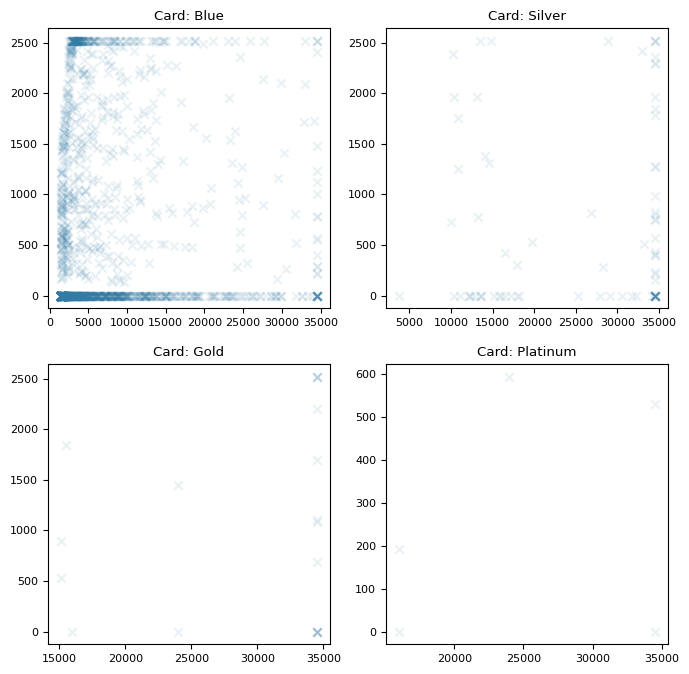

In [21]:
print(df["Card_Category"].dropna().unique())

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.rcParams["font.size"] = 8
index = 0
cards = df["Card_Category"].dropna().unique()

for j in range(2):
    for i in range(2):
        if index > len(cards):
            axes[i, j].set_visible(False)
            break
        
        card = cards[index]
        condition = (df["Card_Category"] == card) & (df["Attrition_Flag_num"] == 0)
        x = df[condition]["Credit_Limit"]
        y = df[condition]["Total_Revolving_Bal"]
        axes[i, j].scatter(x, y, alpha=0.1, color="#327BA5", marker="x")
        axes[i, j].set_title(f"Card: {card}")
        
        index += 1

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

<p>
    These graphs deliver valuable insight not only that most of churn happens on <i>Blue card</i> customers but also that the patterns are differnces while Blue card's pattern is familiar the others, even the sample is small, are not.
</p>

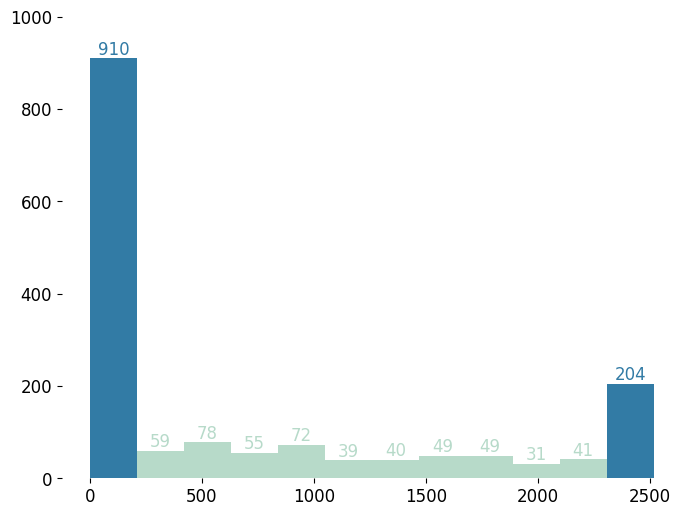

In [22]:

x = df["Total_Revolving_Bal"]
y = df[df["Attrition_Flag_num"] == 0]

plt.rcParams["font.size"] = 12
fig = plt.figure(figsize=(8, 6))

ax = sns.histplot(
    data=y,
    x="Total_Revolving_Bal",
    color="#9FCEB8",
    edgecolor=None
)

ax.patches[0].set_facecolor("#327BA5")
ax.patches[-1].set_facecolor("#327BA5")
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height,
            int(height),
            ha='center',
            va='bottom',
            fontsize=12,
            color=patch.get_facecolor()
        )
        
max_height = max(p.get_height() for p in ax.patches)
ax.spines[["top", "right", "left", "bottom"]].set_visible(False)

plt.ylim(top=max_height * 1.1)
# plt.title("Attrition by Total Revolving", pad=20)
plt.ylabel("")
plt.xlabel("")
plt.show()

<p>
    Let's see the total loss on Card category interms of numbers and valuation.
</p>

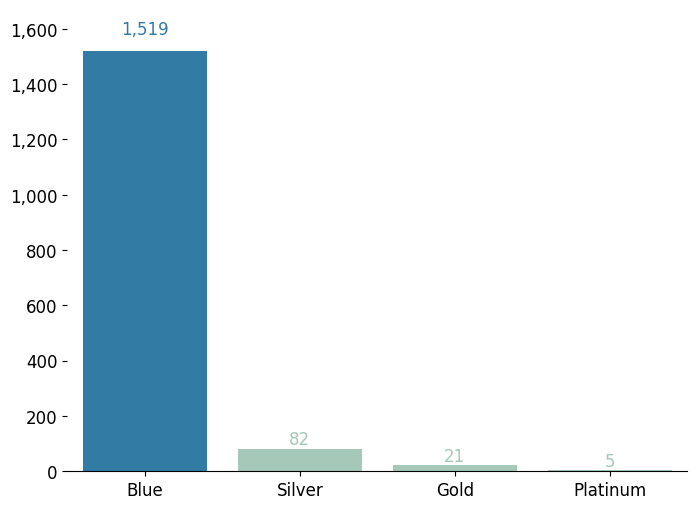

In [23]:
df_filtered = df[df["Attrition_Flag_num"] == 0]
count = df_filtered["Card_Category"].value_counts()
percent = df_filtered["Card_Category"].value_counts(normalize=True) * 100
cards_stat = pd.DataFrame({
    "Card": count.index,
    "# of Card": count.values,
    "Percentage": percent.values.round(2)
})
cards_stat

plt.figure(figsize=(8, 6))
plt.rcParams["font.size"] = 12

ax = sns.barplot(
    data=cards_stat,
    x="Card",
    y="# of Card",
    color="#9FCEB8"
)
ax.patches[0].set_facecolor("#327BA5")
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height * 1.03,
            f"{int(height):,}",
            ha='center',
            va='bottom',
            fontsize=12,
            color=patch.get_facecolor()
        )
        
max_height = max(p.get_height() for p in ax.patches)

ticks = plt.yticks()[0]
ax.spines[["top", "right", "left"]].set_visible(False)
ax.set_ylim(top=max_height * 1.1)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(ticks, [f"{int(t):,}" for t in ticks]) 

plt.show()

  Card_Category  Total_Revolving_Bal
0          Blue              1016265
1        Silver                55534
2          Gold                21567
3      Platinum                 1317


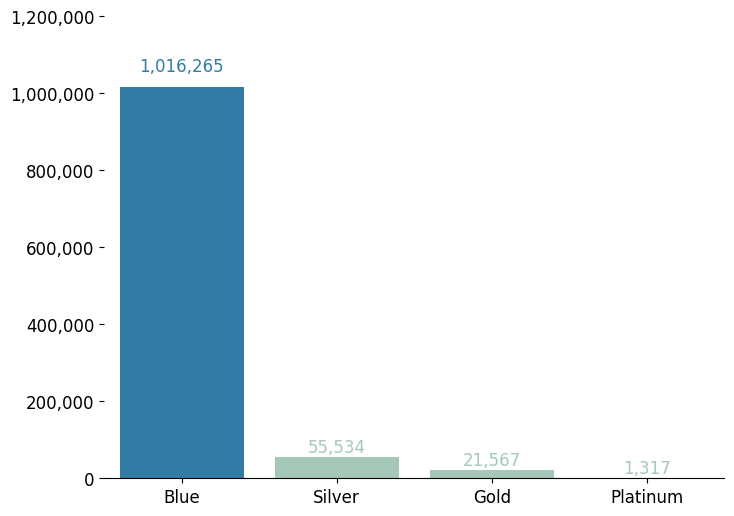

In [24]:
df_filtered = (
    df[df["Attrition_Flag_num"] == 0]
    .groupby("Card_Category")["Total_Revolving_Bal"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
print(df_filtered)


plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_filtered, 
    x="Card_Category", 
    y="Total_Revolving_Bal",
    color="#9FCEB8"
)
ax.spines[["top", "right", "left"]].set_visible(False)
ax.patches[0].set_facecolor("#327BA5")

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height * 1.03,
            f"{int(height):,}",
            ha='center',
            va='bottom',
            fontsize=12,
            color=patch.get_facecolor()
        )

ticks = plt.yticks()[0]
plt.xlabel("")
plt.ylabel("")
plt.yticks(ticks, [f"{int(t):,}" for t in ticks]) 
plt.show()


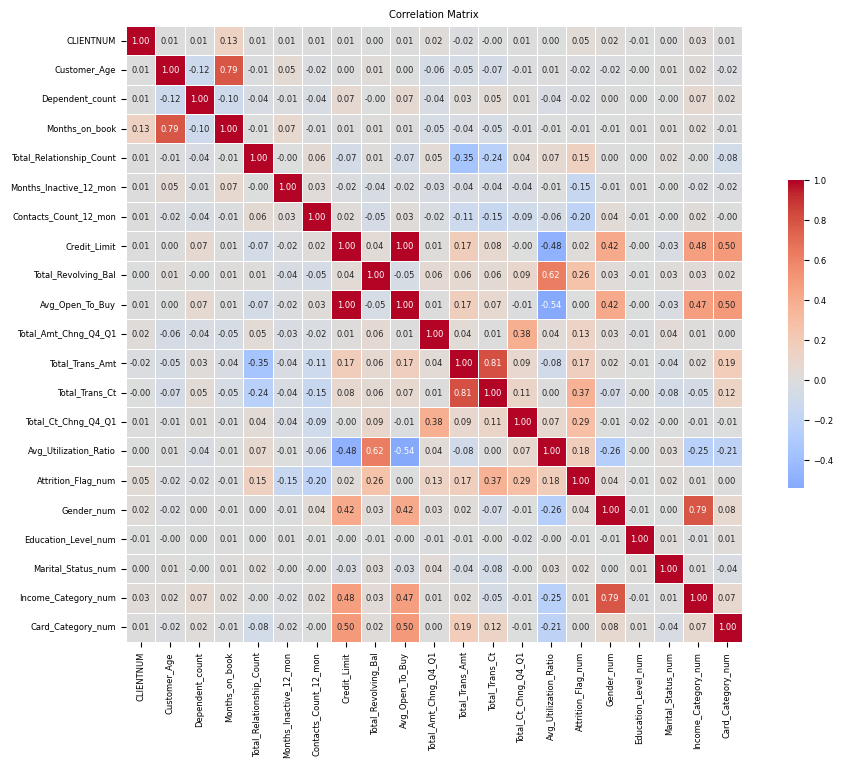

In [25]:
corr = df.corr(numeric_only=True)

plt.rcParams["font.size"] = 6

plt.figure(figsize=(12, 8))
sns.heatmap(
    data=corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

plt.title("Correlation Matrix")
plt.show()

Convert qualitative variable to 0/1, if possible.

In [26]:
print(df.columns)
df_filtered = df.drop(columns=["Gender", "Attrition_Flag"])
df_encoded = pd.get_dummies(df_filtered.drop(columns=df.columns[-4:]), drop_first=True)
print(df_encoded.columns)
df_encoded.head()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_num', 'Gender_num', 'Education_Level_num',
       'Marital_Status_num', 'Income_Category_num', 'Card_Category_num'],
      dtype='object')
Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_num', 

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,False,True,False,False,False,False,False,False
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,True,False,False,False,False,True,False,False,False,False
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,False,True,False,False,False,False,False
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,False,True,False,False,False,True,False,False,False,False
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,False,True,False,False,False,False,False,False


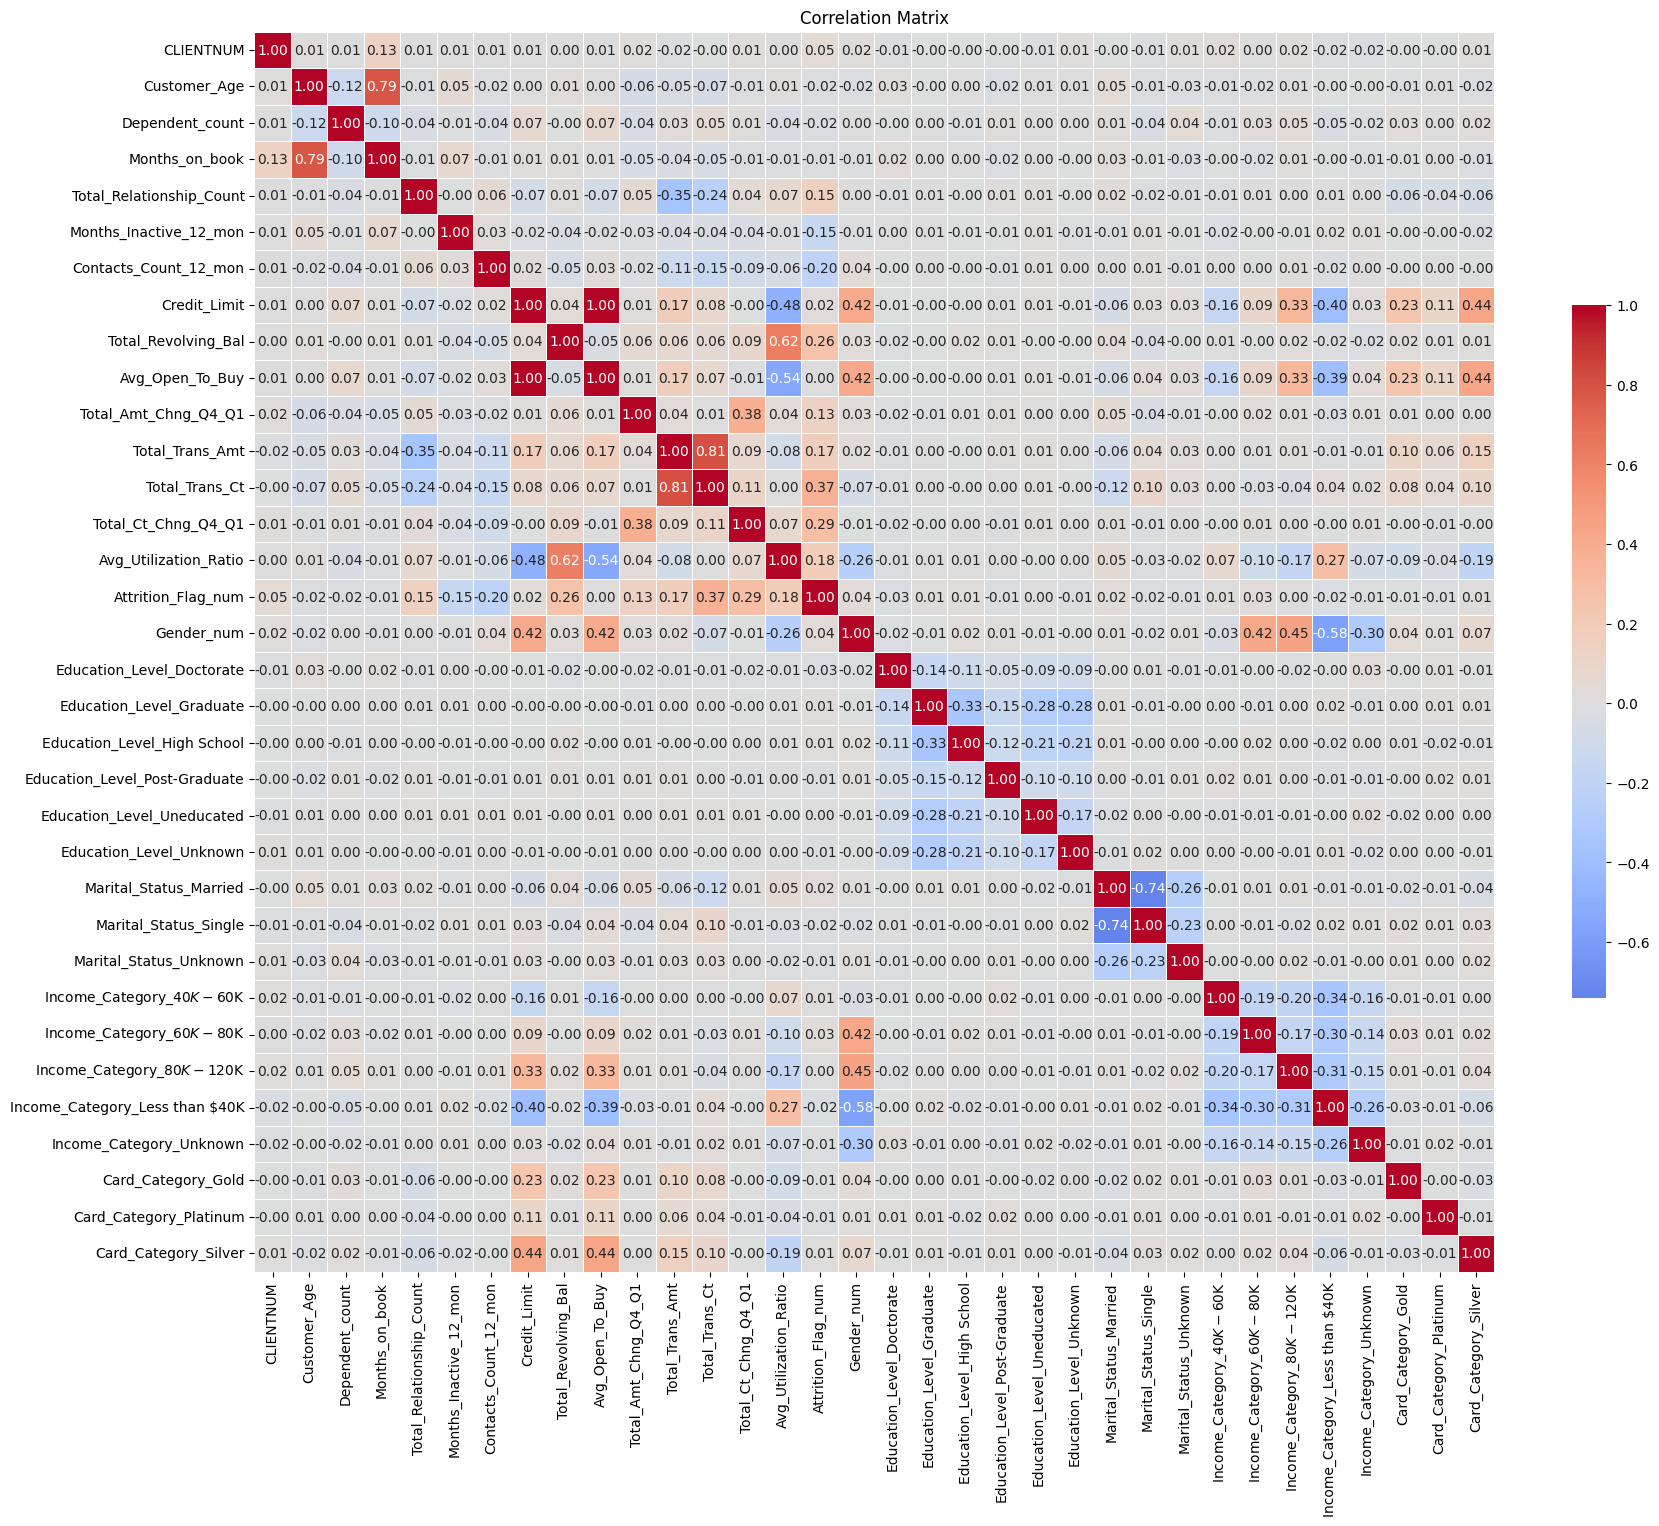

In [27]:
corr = df_encoded.corr(numeric_only=True)

plt.rcParams["font.size"] = 10

plt.figure(figsize=(20, 18))
sns.heatmap(
    data=corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)

plt.title("Correlation Matrix")
plt.show()